In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('covid_cleandf2.csv')

In [4]:
df

,name,path,country,network,date,token_freq,text
0,20191201_FR_RFI_GDELT260769.txt,Raw text/FRClean/20191201_FR_RFI_GDELT260769.txt,FR,RFI,20191201,4,an hivaids awareness campaign on the eve of wo...
1,20191204_AE_KhaleejTimes_GDELT75493.txt,Raw text/AEClean/20191204_AE_KhaleejTimes_GDEL...,AE,KhaleejTimes,20191204,16,wknd inspired living kt home videos interactiv...
2,20191214_TR_AnadoluAgency_NEXIS720304.txt,Raw text/TRClean/20191214_TR_AnadoluAgency_NEX...,TR,AnadoluAgency,20191214,4,virus transmitted to people from wild animals ...
3,20191218_US_USAToday_GNAPI57390.txt,Raw text/USClean/20191218_US_USAToday_GNAPI573...,US,USAToday,20191218,7,alabama mobile researchers from the university...
4,20191218_US_TheNewHumanitarian_GNAPI57383.txt,Raw text/USClean/20191218_US_TheNewHumanitaria...,US,TheNewHumanitarian,20191218,4,the humanitarian sector has a trust problem th...
...,...,...,...,...,...,...,...
13426,20200819_GB_DailyMail_NEXIS322650.txt,Raw text/UKClean/20200819_GB_DailyMail_NEXIS32...,UK,DailyMail,20200819,16,jill biden shrugged of president trump is atta...
13427,20200819_KW_KUNA_GDELT162457.txt,Raw text/KWClean/20200819_KW_KUNA_GDELT162457.txt,KW,KUNA,20200819,6,loc23272027 gmt kuwait april 23 kuna un secret...
13428,20200819_KW_KUNA_GDELT169766.txt,Raw text/KWClean/20200819_KW_KUNA_GDELT169766.txt,KW,KUNA,20200819,3,loc15121212 gmt rome april 26 kuna the kuwaiti...
13429,20200819_KW_KUNA_GDELT174322.txt,Raw text/KWClean/20200819_KW_KUNA_GDELT174322.txt,KW,KUNA,20200819,5,loc02532353 gmt kuwait march 6 kuna the kuwait...


In [5]:
countries = ['CN','IR','QA','RU','TR','US','UK','DE','FR','AE','SA','KW']
for i in countries:
    num = (df.loc[df['country']==i]).shape[0]
    print(num,"news related to covid-19 in",i)

1190 news related to covid-19 in CN
1327 news related to covid-19 in IR
574 news related to covid-19 in QA
1069 news related to covid-19 in RU
425 news related to covid-19 in TR
3742 news related to covid-19 in US
2682 news related to covid-19 in UK
251 news related to covid-19 in DE
601 news related to covid-19 in FR
964 news related to covid-19 in AE
546 news related to covid-19 in SA
60 news related to covid-19 in KW


In [6]:
New_Global_Media_Players = ['CN','IR','TR','RU']
Euro_Atlantic_Countries = ['US','UK','DE','FR']
Gulf_Donor = ['AE','SA','KW','QA']

In [7]:
def countFile(block):
    num = 0
    for i in block:
        num = num + (df.loc[df['country']==i]).shape[0]
    print(num,"news related to covid-19.",'\n')

In [8]:
print('New Global Media Players:')
countFile(New_Global_Media_Players)
print('Euro-Atlantic Countries:')
countFile(Euro_Atlantic_Countries)
print('Gulf Donor:')
countFile(Gulf_Donor)

New Global Media Players:
4011 news related to covid-19. 

Euro-Atlantic Countries:
7276 news related to covid-19. 

Gulf Donor:
2144 news related to covid-19. 



In [9]:
year_month = []
for i in range(df.shape[0]):
    d = str(df.loc[i,'date'])
    month = d[0:6]
    year_month.append(month)
df['year_month'] = year_month

In [10]:
monthList = ['201912','202001','202002','202003','202004','202005','202006','202007','202008']
monthfile = []
for m in monthList:
    month_count = 0
    for i in range(df.shape[0]):
        if df.loc[i,'year_month'] == m:
            month_count = month_count + 1
    monthfile.append(month_count)
    print('There are',month_count,'articles in',m)

There are 12 articles in 201912
There are 93 articles in 202001
There are 613 articles in 202002
There are 2998 articles in 202003
There are 4325 articles in 202004
There are 2223 articles in 202005
There are 1382 articles in 202006
There are 1231 articles in 202007
There are 554 articles in 202008


In [11]:
def count_monthfile(block):
    month_file = []
    for m in monthList:
        month_count = 0
        for i in range(df.shape[0]):
            if df.loc[i,'country'] in block:
                if df.loc[i,'year_month'] == m:
                    month_count = month_count + 1
            month_file.append(month_count)
        print('There are',month_count,'articles in',m)

In [12]:
count_monthfile(New_Global_Media_Players)
count_monthfile(Euro_Atlantic_Countries)
count_monthfile(Gulf_Donor)

There are 1 articles in 201912
There are 30 articles in 202001
There are 199 articles in 202002
There are 995 articles in 202003
There are 1350 articles in 202004
There are 662 articles in 202005
There are 348 articles in 202006
There are 332 articles in 202007
There are 94 articles in 202008
There are 4 articles in 201912
There are 53 articles in 202001
There are 364 articles in 202002
There are 1626 articles in 202003
There are 2323 articles in 202004
There are 1131 articles in 202005
There are 727 articles in 202006
There are 672 articles in 202007
There are 376 articles in 202008
There are 7 articles in 201912
There are 10 articles in 202001
There are 50 articles in 202002
There are 377 articles in 202003
There are 652 articles in 202004
There are 430 articles in 202005
There are 307 articles in 202006
There are 227 articles in 202007
There are 84 articles in 202008


# Data summary

#### All countries from 3 blocks

4011 news related to covid-19 in New_Global_Media_Players  
7276 news related to covid-19 in Euro_Atlantic_Countries  
2144 news related to covid-19 in Gulf_Donor

There are 12 articles in 201912  
There are 93 articles in 202001  
There are 613 articles in 202002  
There are 2998 articles in 202003  
There are 4325 articles in 202004  
There are 2223 articles in 202005  
There are 1382 articles in 202006  
There are 1231 articles in 202007  
There are 554 articles in 202008

#### New Global Media Players:

There are 1 articles in 201912  
There are 30 articles in 202001  
There are 199 articles in 202002  
There are 995 articles in 202003  
There are 1350 articles in 202004    
There are 662 articles in 202005    
There are 348 articles in 202006    
There are 332 articles in 202007    
There are 94 articles in 202008  

#### Euro-Atlantic Countries:

There are 4 articles in 201912  
There are 53 articles in 202001  
There are 364 articles in 202002  
There are 1626 articles in 202003  
There are 2323 articles in 202004  
There are 1131 articles in 202005  
There are 727 articles in 202006  
There are 672 articles in 202007  
There are 376 articles in 202008

#### Gulf Donor:

There are 7 articles in 201912  
There are 10 articles in 202001  
There are 50 articles in 202002  
There are 377 articles in 202003  
There are 652 articles in 202004  
There are 430 articles in 202005  
There are 307 articles in 202006  
There are 227 articles in 202007  
There are 84 articles in 202008

# Some visualization

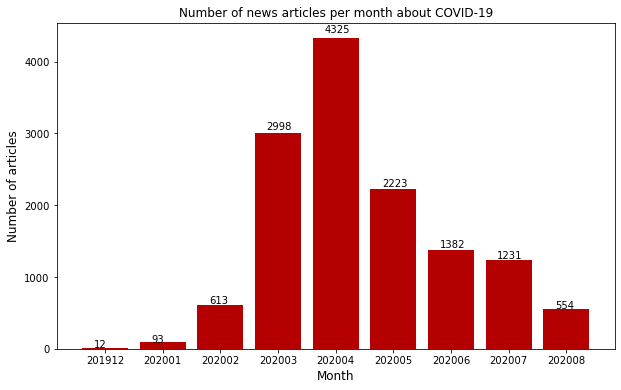

In [23]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.- 0.2, 1.02*height, '%s' % int(height))

plt.figure(figsize=(10,6))
autolabel(plt.bar(range(len(monthfile)), monthfile, tick_label=monthList, color='#B50000'))
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of articles', fontsize=12)
plt.title('Number of news articles per month about COVID-19')
plt.show()


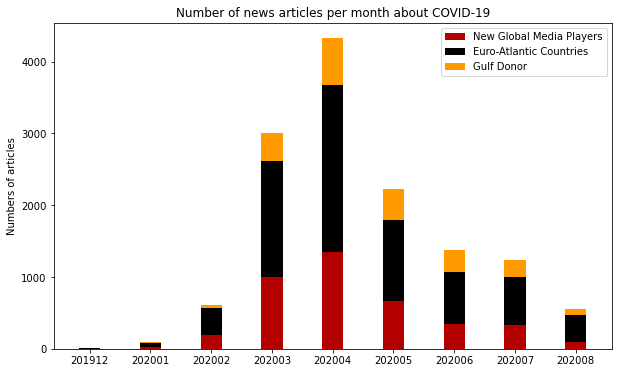

In [24]:
ngmp = [1,30,199,995,1350,662,348,332,94]
eac = [4,53,364,1626,2323,1131,727,672,376]
gd = [7,10,50,377,652,430,307,227,84]
N = 9
ind = np.arange(N)
plt.figure(figsize=(10,6)) 
plt.xticks(ind, monthList)
plt.ylabel('Numbers of articles')
d = []
for i in range(0, len(ngmp)):
    sum = ngmp[i] + eac[i]
    d.append(sum)
     
width = 0.35
p1 = plt.bar(ind, ngmp, width, color='#B50000') 
p2 = plt.bar(ind, eac, width, bottom=ngmp,color='#000000')  
p3 = plt.bar(ind, gd, width, bottom=d,color='#FF9900')

plt.legend((p1[0], p2[0], p3[0]), ('New Global Media Players', 'Euro-Atlantic Countries', 'Gulf Donor'),loc = 1)
plt.title('Number of news articles per month about COVID-19')
plt.show()